<a href="https://colab.research.google.com/github/DrKenReid/Introductory-Data-Science/blob/main/Day_1_Lab_2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Description/Dataset:
The “Breast Cancer Wisconsin (Diagnostic)” dataset is publicly available and can be loaded directly from the Scikit-learn library. The dataset contains 569 instances, each with 30 features and a binary target variable indicating whether the tumor is benign (0) or malignant (1). The features include various measurements and characteristics of the cell nuclei present in the digitized images.

## Key Features:
*   radius (mean of distances from center to points on the perimeter)
*   texture (standard deviation of gray-scale values)
*   perimeter
*   area
*   smoothness (local variation in radius lengths)
*   compactness (perimeter^2 / area - 1.0)
*   concavity (severity of concave portions of the contour)
*   concave points (number of concave portions of the contour)
*   symmetry
*   fractal dimension (“coastline approximation” - 1)

In [10]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [11]:
# Load the Breast Cancer Wisconsin (Diagnostic) dataset
data = load_breast_cancer()
X = data.data
y = data.target


The number 42 is often chosen as the random seed in examples and tutorials because it is a reference to "[The Hitchhiker's Guide to the Galaxy](https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy#Answer_to_the_Ultimate_Question_of_Life,_the_Universe,_and_Everything_(42))" by Douglas Adams, where 42 is humorously described as "the answer to the ultimate question of life, the universe, and everything." It has since become a popular, whimsical choice for a random seed in many coding contexts.

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Logistic Regression

**Description:**  
Logistic regression is a statistical method used for binary classification. It models the probability of a binary outcome using a logistic function. The output of logistic regression is a probability value that can be mapped to two distinct classes. It is especially useful for understanding the relationship between a dependent binary variable and one or more independent variables by fitting data to a logistic curve.

**Question:** What is logistic regression used for?  
**Answer:** Binary classification.

**Question:** How does logistic regression model probabilities?  
**Answer:** Using a logistic function.

**Question:** What is the output of logistic regression?  
**Answer:** A probability value.

**Question:** Can logistic regression handle multiple independent variables?  
**Answer:** Yes.

**Question:** What kind of relationship does logistic regression help understand?  
**Answer:** The relationship between a dependent binary variable and independent variables.

## Decision Tree

**Description:**  
A decision tree is a non-parametric supervised learning method used for both classification and regression tasks. It splits the dataset into subsets based on the most significant attribute at each node, creating a tree-like model of decisions. The model predicts the target value by learning simple decision rules inferred from the data features. Decision trees are easy to interpret and visualize but can be prone to overfitting.

**Question:** What type of learning method is a decision tree?  
**Answer:** Non-parametric supervised learning.

**Question:** What tasks can decision trees be used for?  
**Answer:** Classification and regression.

**Question:** How does a decision tree make predictions?  
**Answer:** By learning simple decision rules from data features.

**Question:** Are decision trees easy to interpret?  
**Answer:** Yes.

**Question:** What is a common issue with decision trees?  
**Answer:** Overfitting.

## Random Forest

**Description:**  
Random forest is an ensemble learning method used for classification, regression, and other tasks. It operates by constructing multiple decision trees during training and outputting the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random forests correct the habit of decision trees to overfit to their training set by averaging multiple decision trees trained on different parts of the same dataset.

**Question:** What type of method is a random forest?  
**Answer:** Ensemble learning method.

**Question:** How does random forest operate?  
**Answer:** By constructing multiple decision trees.

**Question:** What is the output of a random forest for classification?  
**Answer:** The mode of the classes.

**Question:** How does random forest handle overfitting?  
**Answer:** By averaging multiple decision trees.

**Question:** What tasks can random forest be used for?  
**Answer:** Classification and regression.

## Support Vector Machine (SVM)

**Description:**  
Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression challenges. It works by finding the hyperplane that best divides a dataset into classes. SVM aims to maximize the margin between the data points of different classes, which helps in achieving better generalization. The kernel trick allows SVM to solve non-linear classification problems by mapping data into higher dimensions where a hyperplane can be used to separate the classes.

**Question:** What can SVM be used for?  
**Answer:** Classification and regression.

**Question:** How does SVM find the best hyperplane?  
**Answer:** By maximizing the margin between data points of different classes.

**Question:** What is the purpose of the kernel trick in SVM?  
**Answer:** To solve non-linear classification problems.

**Question:** What does SVM aim to achieve?  
**Answer:** Better generalization.

**Question:** What does SVM use to separate classes in higher dimensions?  
**Answer:** A hyperplane.

In [14]:
## logistic regression parameters
# [the following penalties will be introduced in more detail in lab3]:
# L1 penalty: lasso (feature elimination); L2 penalty: ridge (handling multicollinearity; reducing overfitting)
lr_params = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}

## decision tree parameters
# max_depth: maximum depth of the tree, which leads to simple or complex models
# min_samples_split: the minimum number of samples required in a node to be considered for splitting
dt_params = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}

## random forest parameters
# n_estimators: the number of trees in the forest; larger value leads to a more accurate model
# max_depth: number of splits for each decision tree in the forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}

## support vector machine parameters
# C: regularization parameter, which controls overfitting; larger value leads to high variance and low bias
# kernel: transforms the input data into a higher dimensional space
svc_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

### Hyperparameter tuning

**Description:**  
Hyperparameter tuning is the process of selecting the optimal set of hyperparameters for a machine learning model. Hyperparameters are the external parameters that govern the training process and model architecture, such as learning rate, number of trees in a random forest, or the regularization parameter in logistic regression. Tuning these parameters helps improve the model's performance by finding the best combination that minimizes the loss function and maximizes predictive accuracy.

## Questions and Answers

**Question:** What are hyperparameters?  
**Answer:** External parameters that govern the training process and model architecture.

**Question:** Why is hyperparameter tuning important?  
**Answer:** To improve model performance.

**Question:** Give an example of a hyperparameter.  
**Answer:** Learning rate.

**Question:** How does hyperparameter tuning affect model accuracy?  
**Answer:** It finds the best combination of hyperparameters to maximize predictive accuracy.

**Question:** What method can be used for hyperparameter tuning?  
**Answer:** Grid search or random search.

In [15]:
# Create a dictionary to store the models and their hyperparameter grids
models = {
    'Logistic Regression': (LogisticRegression(random_state=42), lr_params),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), dt_params),
    'Random Forest': (RandomForestClassifier(random_state=42), rf_params),
    'SVC': (SVC(random_state=42), svc_params)
}

**Reasoning:**

**Why Grid Search is Good as an Introductory Method:**
- **Simplicity:** Grid search is straightforward to understand and implement. It systematically evaluates a predefined set of hyperparameters, making it accessible for beginners.
- **Comprehensive Coverage:** If exhaustive, by searching through all possible combinations of specified hyperparameters, it ensures that the best parameter set within the grid is identified. If not, then you need to decide how long you will let it run for.
- **Baseline Understanding:** Learning grid search provides a solid foundation for understanding hyperparameter tuning and the impact of different hyperparameters on model performance.

**Why Grid Search Isn't Good for Most Parameter Tuning Problems:**
- **Computationally Expensive:** Grid search can be very time-consuming and computationally intensive, especially with large datasets and complex models, as it evaluates all possible combinations in the grid.
- **Inefficient with Large Grids:** When the number of hyperparameters and their possible values increase, the number of combinations grows exponentially, making grid search impractical for extensive searches.
- **Lack of Flexibility:** Grid search does not adapt based on intermediate results, potentially wasting resources on evaluating poor combinations that could have been avoided with more adaptive methods.
- **Suboptimal for High-Dimensional Spaces:** In high-dimensional hyperparameter spaces, grid search may miss the optimal region due to its rigid structure, whereas more advanced methods like random search or Bayesian optimization can explore the space more effectively.

In [16]:
# Perform hyperparameter tuning and evaluate each model
performance_metrics = []
for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    # Collect performance metrics
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred)
    }
    performance_metrics.append(metrics)

### Model evaluation

In [19]:
# to print it cleanly, we'll use tabulate
from tabulate import tabulate

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(performance_metrics)

# Reorder columns to put 'Model' first
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
df = df[columns]

# Format numeric columns to display 4 decimal places
numeric_columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
for col in numeric_columns:
    df[col] = df[col].apply(lambda x: f'{x:.4f}')

# Create a formatted table
table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)

print(table)

+---------------------+----------+-----------+--------+----------+---------+
|        Model        | Accuracy | Precision | Recall | F1 Score | ROC AUC |
+---------------------+----------+-----------+--------+----------+---------+
| Logistic Regression |  0.9912  |  0.9861   | 1.0000 |  0.9930  | 0.9884  |
|    Decision Tree    |  0.9474  |  0.9452   | 0.9718 |  0.9583  | 0.9394  |
|    Random Forest    |  0.9649  |  0.9589   | 0.9859 |  0.9722  | 0.9581  |
|         SVC         |  0.9825  |  0.9726   | 1.0000 |  0.9861  | 0.9767  |
+---------------------+----------+-----------+--------+----------+---------+


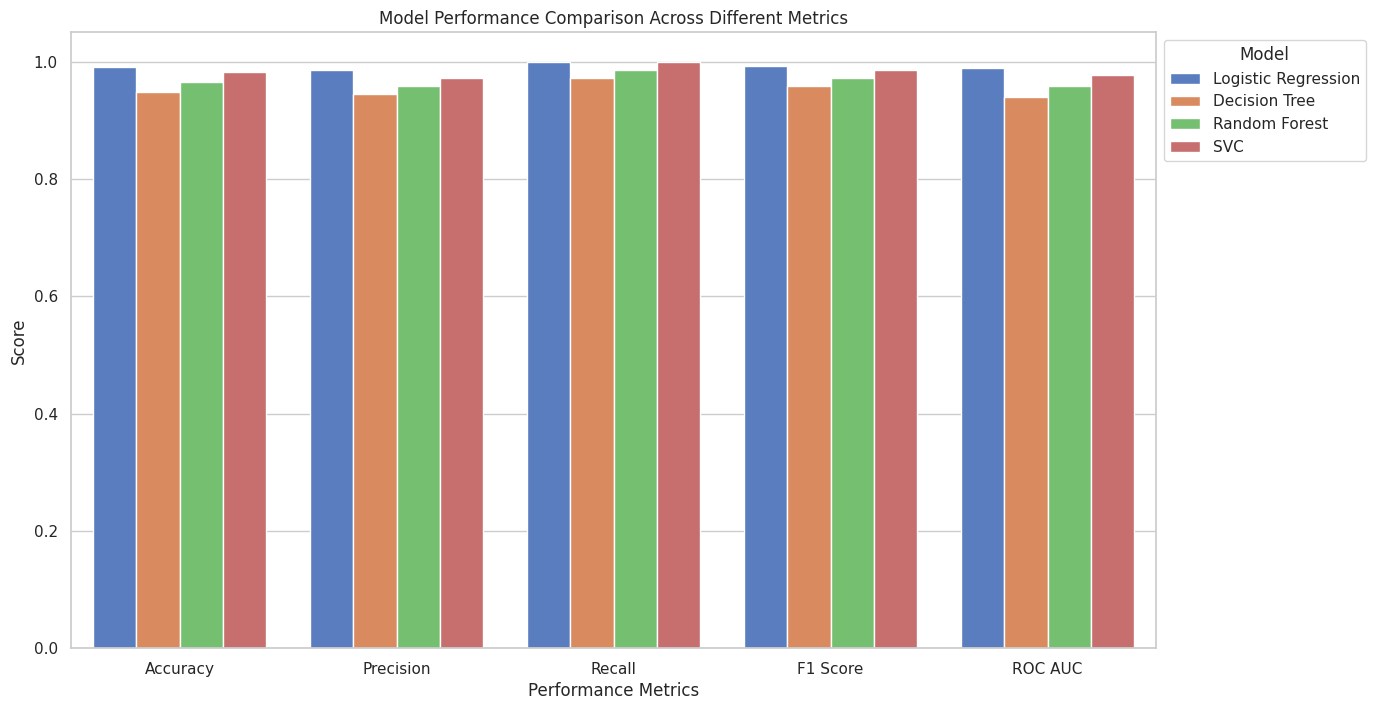

In [18]:
# Visualization:

performance_df = pd.DataFrame(performance_metrics)

# prepare data for seaborn
melted_df = performance_df.melt(id_vars="Model", var_name="Metric", value_name="Value")
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=melted_df, x='Metric', y='Value', hue='Model')
plt.title('Model Performance Comparison Across Different Metrics')
plt.ylabel('Score')
plt.xlabel('Performance Metrics')
plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


## Machine Learning Metrics

### Accuracy
**Description:**  
Accuracy is the ratio of correctly predicted instances to the total instances. It is a commonly used metric for classification problems, indicating the overall correctness of the model.

**Formula:**  
Accuracy = (True Positives + True Negatives) / Total Number of Instances

### Precision
**Description:**  
Precision is the ratio of correctly predicted positive instances to the total predicted positive instances. It measures the accuracy of positive predictions.

**Formula:**  
Precision = True Positives / (True Positives + False Positives)

### Recall
**Description:**  
Recall (or Sensitivity) is the ratio of correctly predicted positive instances to all actual positive instances. It measures the model's ability to identify positive instances.

**Formula:**  
Recall = True Positives / (True Positives + False Negatives)

### F1 Score
**Description:**  
The F1 Score is the harmonic mean of precision and recall. It provides a single metric that balances both the concerns of precision and recall, making it useful when you need a balance between the two.

**Formula:**  
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

### ROC AUC
**Description:**  
ROC AUC (Receiver Operating Characteristic - Area Under Curve) measures the performance of a classification model by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The AUC represents the degree of separability, indicating how well the model distinguishes between classes. A higher AUC value indicates better model performance.

**Formulas:**

1. **Trapezoidal Rule:**
AUC = Σ [(x_{i+1} - x_i) * (y_{i+1} + y_i) / 2]
   where x_i and y_i are the coordinates of the ROC curve points.

2. **Mann–Whitney U Statistic:**
AUC = (Σ R_{+} - (n_{+} * (n_{+} + 1) / 2)) / (n_{+} * n_{-})
   where R_{+} is the sum of the ranks for the positive class, n_{+} is the number of positive instances, and n_{-} is the number of negative instances.

## Conclusion

Congratulations! You've reached the end of this lab on classification. Throughout this exercise, you've successfully:

1. Loaded the Breast Cancer Wisconsin (Diagnostic) dataset
2. Split the data into training and testing sets
3. Scaled the features using StandardScaler
4. Implemented and tuned four different classification models:
   - Logistic Regression
   - Decision Tree
   - Random Forest
   - Support Vector Machine (SVM)
5. Performed hyperparameter tuning using GridSearchCV
6. Evaluated each model using multiple performance metrics:
   - Accuracy
   - Precision
   - Recall
   - F1 Score
   - ROC AUC
7. Visualized the performance comparison across different metrics and models

This lab has provided you with hands-on experience in implementing and comparing various classification algorithms, as well as understanding different evaluation metrics for machine learning models.